In [1]:
import pandas as pd

In [26]:
df = pd.read_csv("../data/aggregated_data.csv")
df.head(10)

,County,Year,Total_Transactions,Electric_Vehicle_Count,Electric_Vehicle_Ratio,Second_Electric_Vehicle_Count,Manufacturer_Distribution,Make_Model_Count,Make_Model_Distribution,Vehicle_Type_Distribution,Vehicle_Transaction_Type_Distribution,Electric_Vehicle_Type_Distribution,Electric_Vehicle_Model_Distribution,Manufacturer_Distribution_2023,Make_Model_Distribution_2023,Eletric_Vehicle_Type_2023
0,Ada,2020,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
1,Ada,2021,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
2,Ada,2022,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
3,Ada,2023,1.0,0.0,0.000000,0.0,{'AUDI': 1},1.0,{'AUDI S5': 1},{'PASSENGER CAR': 1},{'Registration at Time of Transfer': 1},{},{},{},{},{}
4,Ada,2024,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
5,Adams,2020,19360.0,19.0,0.098318,222.0,"{'CHEVROLET': 3246, 'FORD': 3179, 'HONDA': 206...",918.0,"{'FORD F-150': 930, 'CHEVROLET SILVERADO': 927...","{'PASSENGER CAR': 7787, 'MULTIPURPOSE PASSENGE...","{'Registration Renewal': 15315, 'Registration ...","{'PASSENGER CAR': 182, 'MULTIPURPOSE PASSENGER...","{'TOYOTA PRIUS': 55, 'HONDA CIVIC': 28, 'TOYOT...","{'TESLA': 21, 'FORD': 8, 'CHEVROLET': 5, 'KIA'...","{'TESLA MODEL 3': 9, 'TESLA MODEL Y': 7, 'FORD...","{'Battery Electric Vehicle (BEV)': 35, 'Plug-i..."
6,Adams,2021,19837.0,29.0,0.146642,287.0,"{'CHEVROLET': 3318, 'FORD': 3192, 'HONDA': 207...",912.0,"{'CHEVROLET SILVERADO': 972, 'FORD F-150': 913...","{'PASSENGER CAR': 7865, 'MULTIPURPOSE PASSENGE...","{'Registration Renewal': 15295, 'Registration ...","{'PASSENGER CAR': 228, 'MULTIPURPOSE PASSENGER...","{'TOYOTA PRIUS': 65, 'HONDA CIVIC': 39, 'TOYOT...","{'TESLA': 21, 'FORD': 8, 'CHEVROLET': 5, 'KIA'...","{'TESLA MODEL 3': 9, 'TESLA MODEL Y': 7, 'FORD...","{'Battery Electric Vehicle (BEV)': 35, 'Plug-i..."
7,Adams,2022,19237.0,36.0,0.187676,289.0,"{'CHEVROLET': 3178, 'FORD': 3105, 'HONDA': 206...",911.0,"{'CHEVROLET SILVERADO': 957, 'FORD F-150': 916...","{'PASSENGER CAR': 7535, 'MULTIPURPOSE PASSENGE...","{'Registration Renewal': 15321, 'Registration ...","{'PASSENGER CAR': 212, 'MULTIPURPOSE PASSENGER...","{'TOYOTA PRIUS': 60, 'HONDA CIVIC': 34, 'TOYOT...","{'TESLA': 21, 'FORD': 8, 'CHEVROLET': 5, 'KIA'...","{'TESLA MODEL 3': 9, 'TESLA MODEL Y': 7, 'FORD...","{'Battery Electric Vehicle (BEV)': 35, 'Plug-i..."
8,Adams,2023,19517.0,46.0,0.236140,324.0,"{'CHEVROLET': 3132, 'FORD': 3103, 'HONDA': 214...",919.0,"{'CHEVROLET SILVERADO': 955, 'FORD F-150': 900...","{'PASSENGER CAR': 7607, 'MULTIPURPOSE PASSENGE...","{'Registration Renewal': 15500, 'Registration ...","{'PASSENGER CAR': 223, 'MULTIPURPOSE PASSENGER...","{'TOYOTA PRIUS': 65, 'TOYOTA RAV4': 31, 'HONDA...","{'TESLA': 21, 'FORD': 8, 'CHEVROLET': 5, 'KIA'...","{'TESLA MODEL 3': 9, 'TESLA MODEL Y': 7, 'FORD...","{'Battery Electric Vehicle (BEV)': 35, 'Plug-i..."
9,Adams,2024,2822.0,9.0,0.319149,53.0,"{'CHEVROLET': 459, 'FORD': 439, 'TOYOTA': 323,...",394.0,"{'CHEVROLET SILVERADO': 144, 'FORD F-150': 129...","{'PASSENGER CAR': 999, 'MULTIPURPOSE PASSENGER...","{'Registration Renewal': 2277, 'Registration a...","{'PASSENGER CAR': 32, 'MULTIPURPOSE PASSENGER ...","{'TOYOTA RAV4': 10, 'TOYOTA PRIUS': 10, 'TOYOT...","{'TESLA': 21, 'FORD': 8, 'CHEVROLET': 5, 'KIA'...","{'TESLA MODEL 3': 9, 'TESLA MODEL Y': 7, 'FORD...","{'Battery Electric Vehicle (BEV)': 35, 'Plug-i..."


In [21]:
df.isnull().sum()

County                                   0
Year                                     0
Total_Transactions                       0
Electric_Vehicle_Count                   0
Electric_Vehicle_Ratio                   0
Second_Electric_Vehicle_Count            0
Manufacturer_Distribution                0
Make_Model_Count                         0
Make_Model_Distribution                  0
Vehicle_Type_Distribution                0
Vehicle_Transaction_Type_Distribution    0
Electric_Vehicle_Type_Distribution       0
Electric_Vehicle_Model_Distribution      0
Manufacturer_Distribution_2023           0
Make_Model_Distribution_2023             0
Eletric_Vehicle_Type_2023                0
dtype: int64

In [ ]:
df

In [22]:
df.dtypes

County                                    object
Year                                       int64
Total_Transactions                       float64
Electric_Vehicle_Count                   float64
Electric_Vehicle_Ratio                   float64
Second_Electric_Vehicle_Count            float64
Manufacturer_Distribution                 object
Make_Model_Count                         float64
Make_Model_Distribution                   object
Vehicle_Type_Distribution                 object
Vehicle_Transaction_Type_Distribution     object
Electric_Vehicle_Type_Distribution        object
Electric_Vehicle_Model_Distribution       object
Manufacturer_Distribution_2023            object
Make_Model_Distribution_2023              object
Eletric_Vehicle_Type_2023                 object
dtype: object

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

County = df.drop('County', axis=1)

numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing
data_processed = preprocessor.fit_transform(df)


In [28]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k) based on domain knowledge or use techniques like the Elbow method
k = 5  # Example number of clusters

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_processed)
clusters = kmeans.predict(data_processed)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Display the data with clusters
print(df[['County', 'Year', 'Cluster']].head())


  County  Year  Cluster
0    Ada  2020        0
1    Ada  2021        0
2    Ada  2022        0
3    Ada  2023        2
4    Ada  2024        0


d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


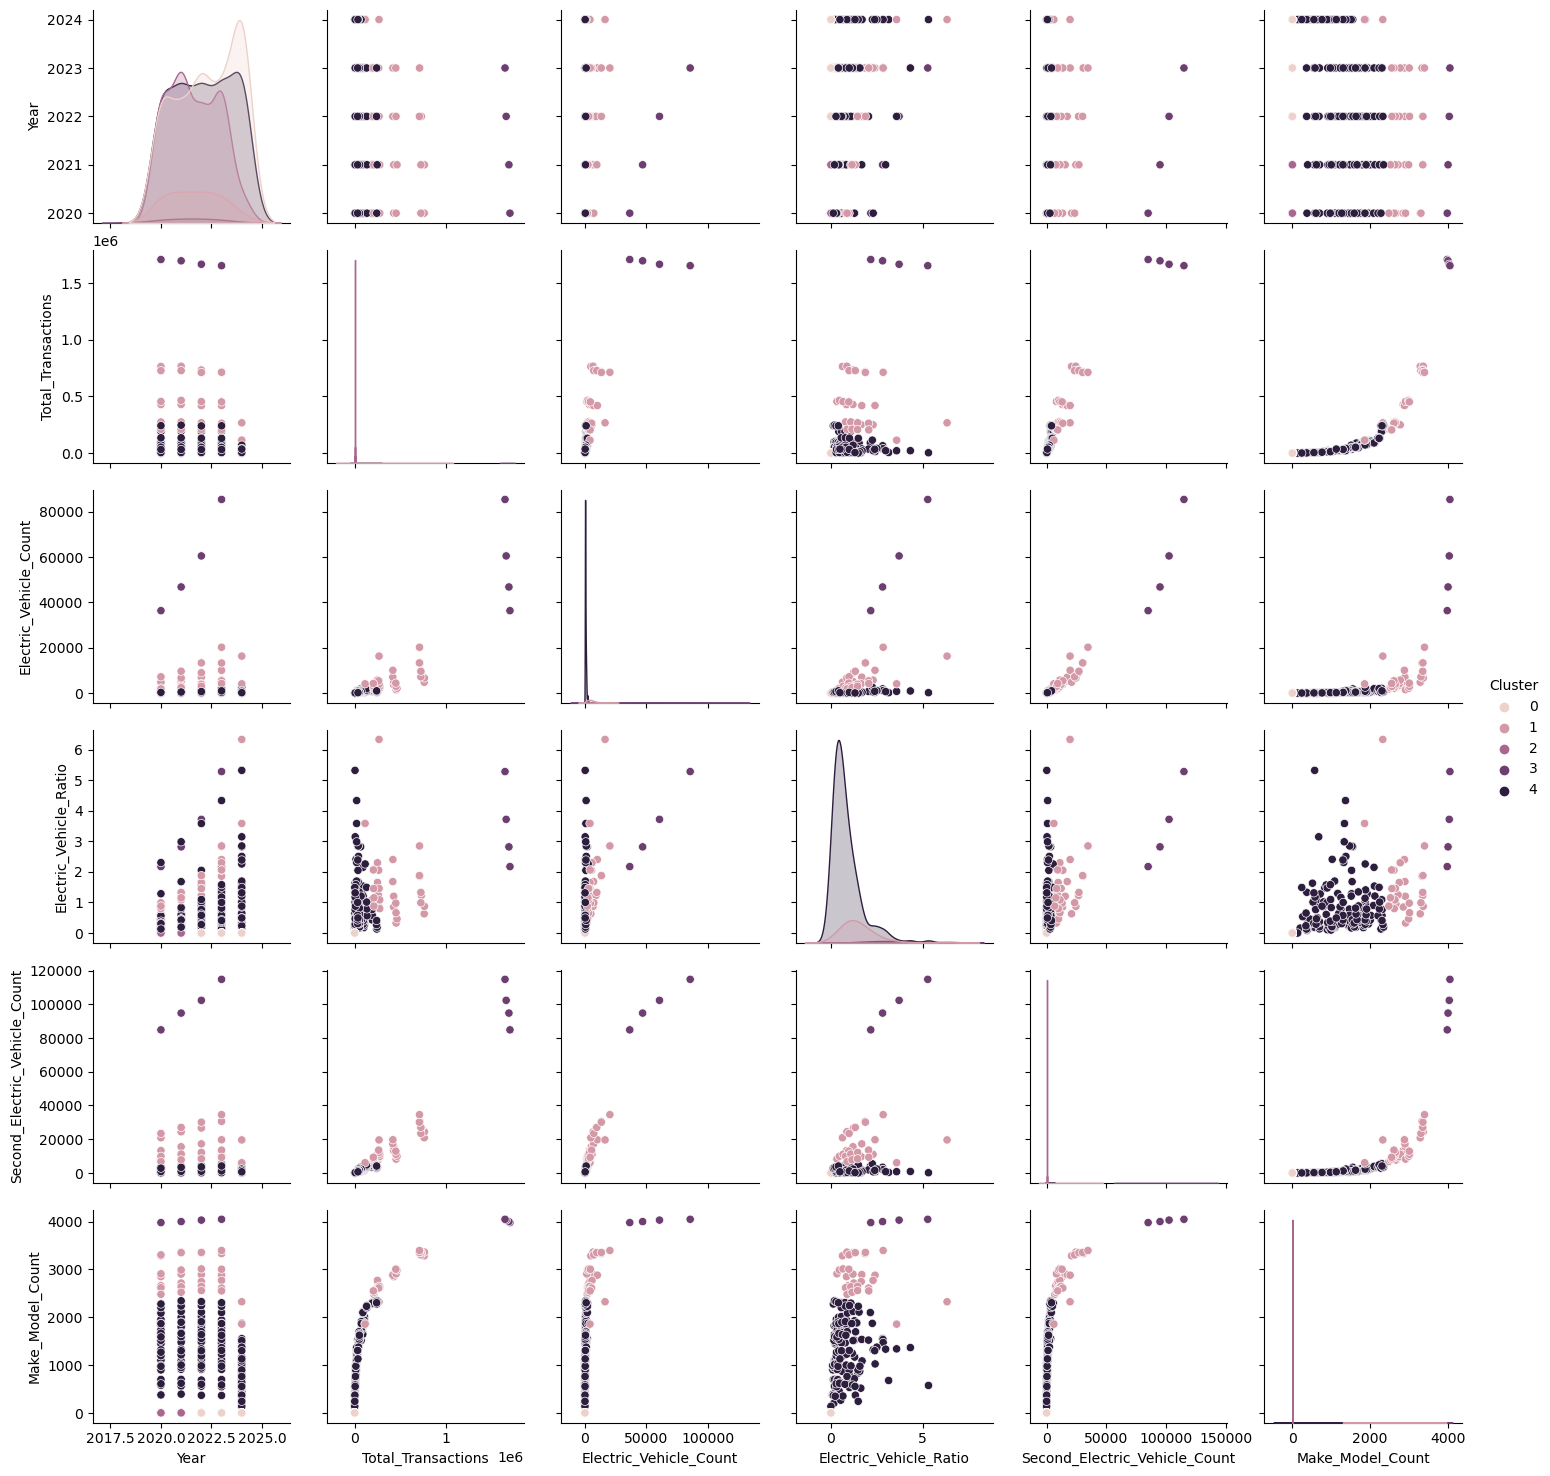

In [29]:
# Assuming analysis and visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the clusters to visualize (this is very hypothetical and depends on your specific features)
sns.pairplot(df, hue='Cluster', vars=numerical_cols)
plt.show()


In [30]:
df

,County,Year,Total_Transactions,Electric_Vehicle_Count,Electric_Vehicle_Ratio,Second_Electric_Vehicle_Count,Manufacturer_Distribution,Make_Model_Count,Make_Model_Distribution,Vehicle_Type_Distribution,Vehicle_Transaction_Type_Distribution,Electric_Vehicle_Type_Distribution,Electric_Vehicle_Model_Distribution,Manufacturer_Distribution_2023,Make_Model_Distribution_2023,Eletric_Vehicle_Type_2023,Cluster
0,Ada,2020,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{},0
1,Ada,2021,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{},0
2,Ada,2022,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{},0
3,Ada,2023,1.0,0.0,0.000000,0.0,{'AUDI': 1},1.0,{'AUDI S5': 1},{'PASSENGER CAR': 1},{'Registration at Time of Transfer': 1},{},{},{},{},{},2
4,Ada,2024,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{},0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Yakima,2020,242273.0,317.0,0.131151,2833.0,"{'FORD': 38384, 'CHEVROLET': 37011, 'TOYOTA': ...",2277.0,"{'FORD F-150': 9576, 'CHEVROLET SILVERADO': 93...","{'PASSENGER CAR': 92938, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 191381, 'Registration...","{'PASSENGER CAR': 2193, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 783, 'TOYOTA RAV4': 293, 'HON...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",4
491,Yakima,2021,246792.0,474.0,0.192663,3328.0,"{'FORD': 38307, 'CHEVROLET': 37316, 'TOYOTA': ...",2344.0,"{'CHEVROLET SILVERADO': 9710, 'FORD F-150': 95...","{'PASSENGER CAR': 92905, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 190019, 'Registration...","{'PASSENGER CAR': 2381, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 759, 'TOYOTA RAV4': 410, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",4
492,Yakima,2022,239987.0,660.0,0.275822,3586.0,"{'FORD': 36677, 'CHEVROLET': 35608, 'TOYOTA': ...",2327.0,"{'CHEVROLET SILVERADO': 9631, 'FORD F-150': 92...","{'PASSENGER CAR': 88131, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 191721, 'Registration...","{'PASSENGER CAR': 2408, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 746, 'TOYOTA RAV4': 495, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",4
493,Yakima,2023,241145.0,982.0,0.408297,4121.0,"{'FORD': 36417, 'CHEVROLET': 35158, 'TOYOTA': ...",2303.0,"{'CHEVROLET SILVERADO': 9793, 'FORD F-150': 93...","{'PASSENGER CAR': 86680, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 195586, 'Registration...","{'PASSENGER CAR': 2619, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 739, 'TOYOTA RAV4': 608, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",4


In [48]:
df2 = pd.read_csv("../data/aggregated_data.csv")
df2

,County,Year,Total_Transactions,Electric_Vehicle_Count,Electric_Vehicle_Ratio,Second_Electric_Vehicle_Count,Manufacturer_Distribution,Make_Model_Count,Make_Model_Distribution,Vehicle_Type_Distribution,Vehicle_Transaction_Type_Distribution,Electric_Vehicle_Type_Distribution,Electric_Vehicle_Model_Distribution,Manufacturer_Distribution_2023,Make_Model_Distribution_2023,Eletric_Vehicle_Type_2023
0,Ada,2020,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
1,Ada,2021,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
2,Ada,2022,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
3,Ada,2023,1.0,0.0,0.000000,0.0,{'AUDI': 1},1.0,{'AUDI S5': 1},{'PASSENGER CAR': 1},{'Registration at Time of Transfer': 1},{},{},{},{},{}
4,Ada,2024,0.0,0.0,0.000000,0.0,{},0.0,{},{},{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Yakima,2020,242273.0,317.0,0.131151,2833.0,"{'FORD': 38384, 'CHEVROLET': 37011, 'TOYOTA': ...",2277.0,"{'FORD F-150': 9576, 'CHEVROLET SILVERADO': 93...","{'PASSENGER CAR': 92938, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 191381, 'Registration...","{'PASSENGER CAR': 2193, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 783, 'TOYOTA RAV4': 293, 'HON...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-..."
491,Yakima,2021,246792.0,474.0,0.192663,3328.0,"{'FORD': 38307, 'CHEVROLET': 37316, 'TOYOTA': ...",2344.0,"{'CHEVROLET SILVERADO': 9710, 'FORD F-150': 95...","{'PASSENGER CAR': 92905, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 190019, 'Registration...","{'PASSENGER CAR': 2381, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 759, 'TOYOTA RAV4': 410, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-..."
492,Yakima,2022,239987.0,660.0,0.275822,3586.0,"{'FORD': 36677, 'CHEVROLET': 35608, 'TOYOTA': ...",2327.0,"{'CHEVROLET SILVERADO': 9631, 'FORD F-150': 92...","{'PASSENGER CAR': 88131, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 191721, 'Registration...","{'PASSENGER CAR': 2408, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 746, 'TOYOTA RAV4': 495, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-..."
493,Yakima,2023,241145.0,982.0,0.408297,4121.0,"{'FORD': 36417, 'CHEVROLET': 35158, 'TOYOTA': ...",2303.0,"{'CHEVROLET SILVERADO': 9793, 'FORD F-150': 93...","{'PASSENGER CAR': 86680, 'MULTIPURPOSE PASSENG...","{'Registration Renewal': 195586, 'Registration...","{'PASSENGER CAR': 2619, 'MULTIPURPOSE PASSENGE...","{'TOYOTA PRIUS': 739, 'TOYOTA RAV4': 608, 'TOY...","{'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...","{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...","{'Battery Electric Vehicle (BEV)': 688, 'Plug-..."


In [49]:
# Group by 'County' and calculate mean for numeric features and sum for total transactions and electric vehicles
grouped_data = df2.groupby('County').agg({
    'Total_Transactions': 'sum',
    'Electric_Vehicle_Count': 'sum',
    'Second_Electric_Vehicle_Count': 'sum',
    'Make_Model_Count': 'mean',
})

# Calculate annual growth rate for electric vehicles as a trend indicator
# First, calculate the yearly sums of electric vehicles per county
annual_electric_vehicles = df2.groupby(['County', 'Year'])['Electric_Vehicle_Count'].sum().unstack()

# Calculate the annual growth rate
annual_growth_rate = annual_electric_vehicles.pct_change(axis=1).mean(axis=1)

# Join the growth rate back to the grouped data
grouped_data['EV_Annual_Growth_Rate'] = annual_growth_rate.fillna(0)

# Reset index to make 'County' a column again
grouped_data.reset_index(inplace=True)

# Show the prepared dataset
grouped_data


,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate
0,Ada,1.0,0.0,0.0,0.2,0.000000
1,Adams,80773.0,139.0,1175.0,810.8,0.060281
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545
...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568


In [50]:
import json

# Convert the stringified dictionary to a real dictionary for 'Vehicle_Type_Distribution'
vehicle_type_distribution = df2['Vehicle_Type_Distribution'].apply(lambda x: json.loads(x.replace("'", '"')))

# Expand the dictionary into separate columns
vehicle_type_df = vehicle_type_distribution.apply(pd.Series)

# Fill NaN values with 0 because NaN implies no transactions of that vehicle type
vehicle_type_df = vehicle_type_df.fillna(0)

vehicle_type_df.columns


C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\473781124.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vehicle_type_df = vehicle_type_distribution.apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\473781124.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vehicle_type_df = vehicle_type_distribution.apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\473781124.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vehicle_type_df = vehicle_type_distribution.apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\473781124.py:7: FutureWarning: The default dtype for empty Series will be 'objec

Index(['PASSENGER CAR', 'MULTIPURPOSE PASSENGER VEHICLE (MPV)', 'TRUCK',
       'MOTORCYCLE', 'INCOMPLETE VEHICLE', 'BUS', 'LOW SPEED VEHICLE (LSV)',
       'TRAILER', 'OFF ROAD VEHICLE'],
      dtype='object')

In [51]:
vehicle_type_df = pd.concat([df2[['Total_Transactions', 'County']],vehicle_type_df], axis=1).groupby('County').mean().reset_index()
vehicle_type_df

,County,Total_Transactions,PASSENGER CAR,MULTIPURPOSE PASSENGER VEHICLE (MPV),TRUCK,MOTORCYCLE,INCOMPLETE VEHICLE,BUS,LOW SPEED VEHICLE (LSV),TRAILER,OFF ROAD VEHICLE
0,Ada,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adams,16154.6,6358.6,4871.8,4452.0,259.2,95.6,79.4,0.0,0.0,0.0
2,Aleutians East Boroug,0.6,0.0,0.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0
3,Anchorage Municipalit,0.8,0.4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asotin,16657.4,4744.0,5752.0,5422.2,618.8,89.0,19.0,0.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,4066.6,1142.4,1331.6,1435.0,114.0,26.4,12.2,0.0,0.0,0.0
95,Walla Walla,43611.0,14623.4,15757.0,11163.4,1660.8,243.4,100.4,1.4,0.4,1.4
96,Whatcom,173483.8,62897.4,65596.0,36679.8,5873.6,803.4,451.8,2.2,2.4,0.0
97,Whitman,26618.8,8096.8,10483.6,6968.6,776.8,201.2,61.8,0.2,1.2,0.0


In [52]:
vehicle_type_df['Passenger_Ratio'] = (vehicle_type_df['PASSENGER CAR'] + vehicle_type_df['MULTIPURPOSE PASSENGER VEHICLE (MPV)'])  / vehicle_type_df['Total_Transactions']
vehicle_type_df['Passenger_Ratio']

0     1.000000
1     0.695183
2     0.666667
3     1.000000
4     0.630110
        ...   
94    0.608371
95    0.696622
96    0.740665
97    0.698018
98    0.718119
Name: Passenger_Ratio, Length: 99, dtype: float64

In [53]:
grouped_data = pd.merge(grouped_data, vehicle_type_df[['County', 'Passenger_Ratio']], on='County')
grouped_data

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110
...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018


In [54]:
# List of other distribution fields to be processed
other_fields = [
    'Electric_Vehicle_Type_Distribution',
    'Vehicle_Transaction_Type_Distribution',
    'Manufacturer_Distribution_2023',
    'Make_Model_Distribution_2023',
    'Eletric_Vehicle_Type_2023'
]

temp = pd.DataFrame()

# Function to process each field
def process_distribution_column(column_name):
    # Apply the fixing method to the column and expand into separate features
    temp[column_name] = df2[column_name].apply(lambda x: json.loads(x.replace("'", '"')))
    expanded_df = temp[column_name].apply(pd.Series)
    expanded_df = expanded_df.fillna(0)  # Fill NaN with 0
    return expanded_df

# Process each distribution field and store in a dictionary
expanded_fields = {field: process_distribution_column(field) for field in other_fields}

# Display the expanded features for one of the fields as a sample
expanded_fields['Electric_Vehicle_Type_Distribution'].head(), expanded_fields['Electric_Vehicle_Type_Distribution'].columns


C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\2520764408.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  expanded_df = temp[column_name].apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\2520764408.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  expanded_df = temp[column_name].apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\2520764408.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  expanded_df = temp[column_name].apply(pd.Series)
C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\2520764408.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

(   PASSENGER CAR  MULTIPURPOSE PASSENGER VEHICLE (MPV)  TRUCK  MOTORCYCLE  \
 0            0.0                                   0.0    0.0         0.0   
 1            0.0                                   0.0    0.0         0.0   
 2            0.0                                   0.0    0.0         0.0   
 3            0.0                                   0.0    0.0         0.0   
 4            0.0                                   0.0    0.0         0.0   
 
    LOW SPEED VEHICLE (LSV)  INCOMPLETE VEHICLE  BUS  
 0                      0.0                 0.0  0.0  
 1                      0.0                 0.0  0.0  
 2                      0.0                 0.0  0.0  
 3                      0.0                 0.0  0.0  
 4                      0.0                 0.0  0.0  ,
 Index(['PASSENGER CAR', 'MULTIPURPOSE PASSENGER VEHICLE (MPV)', 'TRUCK',
        'MOTORCYCLE', 'LOW SPEED VEHICLE (LSV)', 'INCOMPLETE VEHICLE', 'BUS'],
       dtype='object'))

In [55]:
expanded_fields['Electric_Vehicle_Type_Distribution']

,PASSENGER CAR,MULTIPURPOSE PASSENGER VEHICLE (MPV),TRUCK,MOTORCYCLE,LOW SPEED VEHICLE (LSV),INCOMPLETE VEHICLE,BUS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
490,2193.0,788.0,165.0,2.0,2.0,0.0,0.0
491,2381.0,1247.0,170.0,3.0,1.0,0.0,0.0
492,2408.0,1643.0,190.0,4.0,1.0,0.0,0.0
493,2619.0,2254.0,227.0,2.0,1.0,0.0,0.0


In [56]:
vehicle_type_df = pd.concat([df2['County'], expanded_fields['Electric_Vehicle_Type_Distribution']], axis=1).groupby('County').mean().reset_index()
vehicle_type_df

,County,PASSENGER CAR,MULTIPURPOSE PASSENGER VEHICLE (MPV),TRUCK,MOTORCYCLE,LOW SPEED VEHICLE (LSV),INCOMPLETE VEHICLE,BUS
0,Ada,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Adams,175.4,70.2,17.0,0.2,0.0,0.0,0.0
2,Aleutians East Boroug,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anchorage Municipalit,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Asotin,204.8,130.4,19.4,0.6,0.8,0.0,0.0
...,...,...,...,...,...,...,...,...
94,Wahkiakum,94.8,36.2,4.2,0.0,0.0,0.0,0.0
95,Walla Walla,809.4,554.0,40.4,2.0,1.4,0.0,0.0
96,Whatcom,6039.0,2985.0,158.6,18.0,2.2,0.2,0.0
97,Whitman,551.4,403.0,35.8,1.4,0.0,0.0,0.0


In [57]:
vehicle_type_df['EV_Passenger_Ratio'] = ((vehicle_type_df['PASSENGER CAR'] + vehicle_type_df['MULTIPURPOSE PASSENGER VEHICLE (MPV)'])  / vehicle_type_df.sum(axis=1)).fillna(0)
vehicle_type_df['EV_Passenger_Ratio']

C:\Users\mouwu\AppData\Local\Temp\ipykernel_29568\1792510105.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  vehicle_type_df['EV_Passenger_Ratio'] = ((vehicle_type_df['PASSENGER CAR'] + vehicle_type_df['MULTIPURPOSE PASSENGER VEHICLE (MPV)'])  / vehicle_type_df.sum(axis=1)).fillna(0)


0     0.000000
1     0.934551
2     0.000000
3     0.000000
4     0.941573
        ...   
94    0.968935
95    0.968874
96    0.980550
97    0.962485
98    0.952081
Name: EV_Passenger_Ratio, Length: 99, dtype: float64

In [58]:
pd.merge(grouped_data, vehicle_type_df[['County', 'EV_Passenger_Ratio']], on='County')

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,EV_Passenger_Ratio
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.000000
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,0.934551
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.000000
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.000000
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,0.941573
...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,0.968935
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,0.968874
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,0.980550
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,0.962485


In [59]:
vehicle_type_df = pd.concat([df2['County'], expanded_fields['Vehicle_Transaction_Type_Distribution']], axis=1).groupby('County').mean().reset_index()
vehicle_type_df



,County,Registration at Time of Transfer,Registration Renewal,Original Registration
0,Ada,0.2,0.0,0.0
1,Adams,2555.4,12741.6,819.6
2,Aleutians East Boroug,0.0,0.6,0.0
3,Anchorage Municipalit,0.0,0.8,0.0
4,Asotin,1496.6,13760.4,1388.8
...,...,...,...,...
94,Wahkiakum,397.2,3329.4,335.0
95,Walla Walla,4954.0,35607.0,2990.6
96,Whatcom,20917.8,140271.0,11117.8
97,Whitman,2570.0,21883.0,2137.2


In [60]:
grouped_data = pd.merge(grouped_data, vehicle_type_df, on='County')
grouped_data

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8
...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2


In [61]:
all_models_df = pd.read_csv('../data/all_models.csv')
all_brands_df = pd.read_csv('../data/all_brands.csv')

In [62]:
df2['Manufacturer_Distribution_2023']

0                                                     {}
1                                                     {}
2                                                     {}
3                                                     {}
4                                                     {}
                             ...                        
490    {'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...
491    {'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...
492    {'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...
493    {'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...
494    {'TESLA': 436, 'CHEVROLET': 99, 'TOYOTA': 62, ...
Name: Manufacturer_Distribution_2023, Length: 495, dtype: object

In [63]:
major_brands = ['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW', 'TOYOTA', 'KIA',
       'VOLKSWAGEN', 'VOLVO', 'AUDI']

def calculate_major_brand_proportions(distribution):
    distribution = json.loads(distribution.replace("'", '"'))
    total_vehicles = sum(distribution.values())
    major_brand_vehicles = sum(count for brand, count in distribution.items() if brand in major_brands)
    proportion = major_brand_vehicles / total_vehicles if total_vehicles > 0 else 0
    return proportion


df2['Major_Brand_Proportion_2023'] = df2['Manufacturer_Distribution_2023'].apply(calculate_major_brand_proportions)
df2[['County', 'Major_Brand_Proportion_2023']]


,County,Major_Brand_Proportion_2023
0,Ada,0.000000
1,Ada,0.000000
2,Ada,0.000000
3,Ada,0.000000
4,Ada,0.000000
...,...,...
490,Yakima,0.845226
491,Yakima,0.845226
492,Yakima,0.845226
493,Yakima,0.845226


In [64]:
grouped_data = pd.merge(grouped_data, df2[['County', 'Major_Brand_Proportion_2023']].groupby("County").mean().reset_index(), on='County')
grouped_data

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0,0.000000
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6,0.895833
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0,0.000000
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0,0.000000
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8,0.808219
...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0,0.816667
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6,0.826087
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8,0.848107
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2,0.865269


In [70]:
# Load the all_models data to get the list of major models
major_models = ['TESLA MODEL 3', 'TESLA MODEL Y', 'NISSAN LEAF', 'TESLA MODEL S',
       'CHEVROLET VOLT', 'CHEVROLET BOLT EV', 'TESLA MODEL X',
       'TOYOTA PRIUS PRIME', 'KIA NIRO', 'BMW I3']  # Assuming the model data is in the first column

# Function to calculate the proportion of vehicles from major models
def calculate_major_model_proportions(distribution):
    total_vehicles = sum(distribution.values())
    major_model_vehicles = sum(count for model, count in distribution.items() if model in major_models)
    proportion = major_model_vehicles / total_vehicles if total_vehicles > 0 else 0
    return proportion

def calculate_electric_vehicle_type_proportion(distribution):
    total_vehicles = sum(distribution.values())
    return total_vehicles / sum(df2['Eletric_Vehicle_Type_2023'].apply(lambda x: json.loads(x.replace("'", '"'))).apply(lambda x: sum(x.values()))) if total_vehicles > 0 else 0


# Re-apply the function to calculate major model proportions without string conversion
df2['Major_Model_Proportion_2023'] = df2['Make_Model_Distribution_2023'].apply(lambda x: json.loads(x.replace("'", '"'))).apply(calculate_major_model_proportions)

# Re-calculate the proportion of electric vehicle types without string conversion
df2['Electric_Vehicle_Type_Proportion_2023'] = df2['Eletric_Vehicle_Type_2023'].apply(lambda x: json.loads(x.replace("'", '"'))).apply(calculate_electric_vehicle_type_proportion)

# Show the results for the proportion calculations
df2[['Make_Model_Distribution_2023', 'Major_Model_Proportion_2023', 'Eletric_Vehicle_Type_2023', 'Electric_Vehicle_Type_Proportion_2023']]



,Make_Model_Distribution_2023,Major_Model_Proportion_2023,Eletric_Vehicle_Type_2023,Electric_Vehicle_Type_Proportion_2023
0,{},0.00000,{},0.000000
1,{},0.00000,{},0.000000
2,{},0.00000,{},0.000000
3,{},0.00000,{},0.000000
4,{},0.00000,{},0.000000
...,...,...,...,...
490,"{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...",0.61608,"{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",0.001121
491,"{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...",0.61608,"{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",0.001121
492,"{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...",0.61608,"{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",0.001121
493,"{'TESLA MODEL 3': 190, 'TESLA MODEL Y': 158, '...",0.61608,"{'Battery Electric Vehicle (BEV)': 688, 'Plug-...",0.001121


In [76]:
grouped_data = pd.merge(grouped_data, df2[['County', 'Major_Model_Proportion_2023']].groupby('County').mean().reset_index(), on='County')

In [77]:
grouped_data

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023,Major_Model_Proportion_2023
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0,0.000000,0.000000
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6,0.895833,0.604167
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0,0.000000,0.000000
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0,0.000000,0.000000
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8,0.808219,0.506849
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0,0.816667,0.583333
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6,0.826087,0.556064
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8,0.848107,0.602869
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2,0.865269,0.589820


In [97]:
df2['Eletric_Vehicle_Type_2023']

0                                                     {}
1                                                     {}
2                                                     {}
3                                                     {}
4                                                     {}
                             ...                        
490    {'Battery Electric Vehicle (BEV)': 688, 'Plug-...
491    {'Battery Electric Vehicle (BEV)': 688, 'Plug-...
492    {'Battery Electric Vehicle (BEV)': 688, 'Plug-...
493    {'Battery Electric Vehicle (BEV)': 688, 'Plug-...
494    {'Battery Electric Vehicle (BEV)': 688, 'Plug-...
Name: Eletric_Vehicle_Type_2023, Length: 495, dtype: object

In [104]:
temp = pd.DataFrame([*(df2['Eletric_Vehicle_Type_2023'].apply(lambda x: json.loads(x.replace("'", '"'))).apply(lambda x: x.values()))]).fillna(0)
temp.columns = ['BEV', 'PHEV']

grouped_data = pd.merge(grouped_data, pd.concat([df2['County'], temp], axis=1).groupby('County').mean().reset_index(), on='County')
grouped_data

,County,Total_Transactions,Electric_Vehicle_Count,Second_Electric_Vehicle_Count,Make_Model_Count,EV_Annual_Growth_Rate,Passenger_Ratio,Registration at Time of Transfer,Registration Renewal,Original Registration,Major_Brand_Proportion_2023,Major_Model_Proportion_2023,BEV,PHEV
0,Ada,1.0,0.0,0.0,0.2,0.000000,1.000000,0.2,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Adams,80773.0,139.0,1175.0,810.8,0.060281,0.695183,2555.4,12741.6,819.6,0.895833,0.604167,35.0,13.0
2,Aleutians East Boroug,3.0,0.0,0.0,0.6,0.000000,0.666667,0.0,0.6,0.0,0.000000,0.000000,0.0,0.0
3,Anchorage Municipalit,4.0,0.0,0.0,0.8,0.000000,1.000000,0.0,0.8,0.0,0.000000,0.000000,0.0,0.0
4,Asotin,83287.0,214.0,1566.0,971.8,0.002545,0.630110,1496.6,13760.4,1388.8,0.808219,0.506849,47.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Wahkiakum,20333.0,143.0,533.0,530.8,0.250655,0.608371,397.2,3329.4,335.0,0.816667,0.583333,38.0,22.0
95,Walla Walla,218055.0,1221.0,5815.0,1454.6,0.049271,0.696622,4954.0,35607.0,2990.6,0.826087,0.556064,294.0,143.0
96,Whatcom,867419.0,12237.0,33778.0,2282.0,0.034677,0.740665,20917.8,140271.0,11117.8,0.848107,0.602869,3169.0,1084.0
97,Whitman,133094.0,805.0,4153.0,1145.8,0.173568,0.698018,2570.0,21883.0,2137.2,0.865269,0.589820,220.0,114.0


In [105]:
grouped_data.to_csv('../data/prepared_data.csv', index=False)

In [ ]:

# Split the combined data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data[all_feature_columns], data['High_EV_Ratio'], test_size=0.3, random_state=42)

# Check the shapes of the newly created train and test sets including all features
X_train_all.shape, X_test_all.shape
